#  Dragon Real Estate - Price Prediction Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
%matplotlib inline


In [2]:
housing_df = pd.read_csv("data.csv")

In [3]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         498 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing_df["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284193,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704991,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\haima\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\haima\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\haima\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\haima\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6F3FCC048>,
      dtype=object)

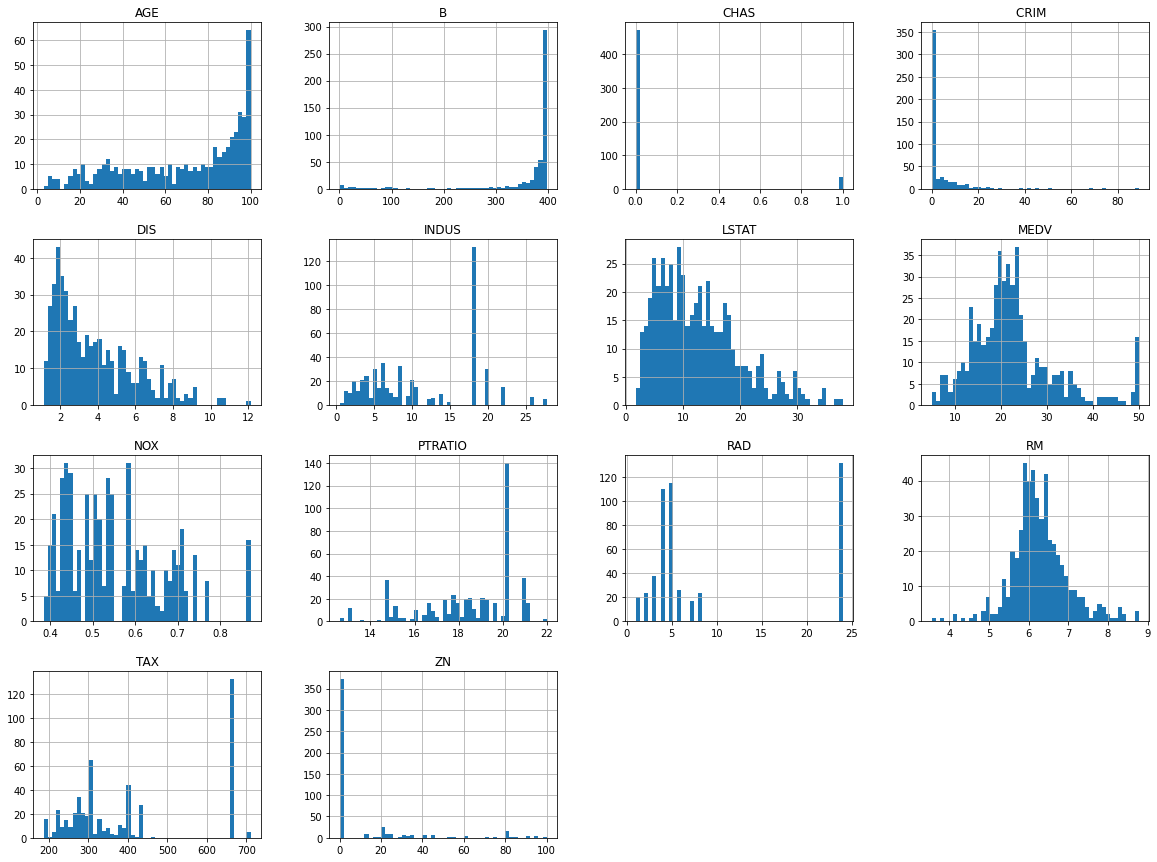

In [7]:
housing_df.hist(bins = 50, figsize = (20,15))

## Train-Test-Split (Coding the underlying function)

In [8]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_size = int(len(data)* test_ratio)
    test_indices = shuffled[:test_size]
    train_indices = shuffled[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [9]:
train_set, test_set = split_train_test(housing_df,0.2)
print(f"Number of rows in training set: {len(train_set)}\nNumber of rows in test set: {len(test_set)}")

Number of rows in training set: 405
Number of rows in test set: 101


## Train-Test-Split (Using the built-in function)

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_df, test_size = 0.2, random_state = 42)
print(f"Number of rows in training set: {len(train_set)}\nNumber of rows in test set: {len(test_set)}")

Number of rows in training set: 404
Number of rows in test set: 102


## Stratified sampling to deal with "CHAS" categorical feature

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42 )
for train_index, test_index in split.split(housing_df, housing_df["CHAS"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]
    
print("Training set value count : ")    
print(strat_train_set["CHAS"].value_counts())
print("\n\n")
print("Test set value count : ")  
print(strat_test_set["CHAS"].value_counts())

Training set value count : 
0    376
1     28
Name: CHAS, dtype: int64



Test set value count : 
0    95
1     7
Name: CHAS, dtype: int64


In [12]:
housing_df = strat_train_set.copy()

## Correlation in the data

In [13]:
corr_matrix = housing_df.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.676873
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

C:\Users\haima\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\haima\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\haima\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\haima\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6F70B8F28>,
      dtype=object)

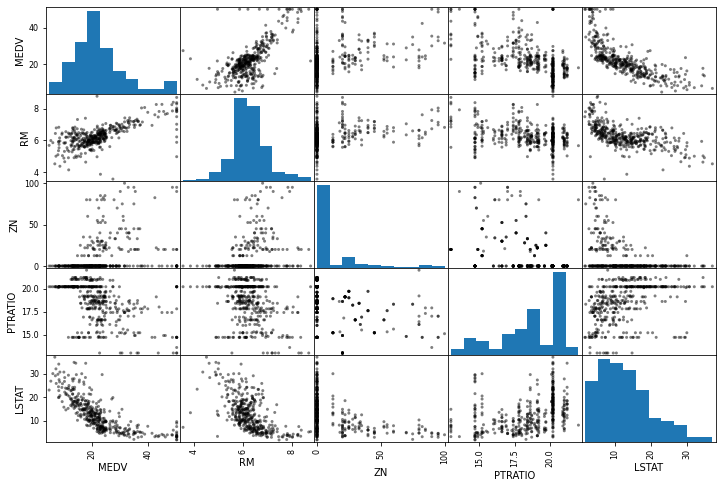

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "PTRATIO", "LSTAT"]
scatter_matrix(housing_df[attributes], figsize = (12,8), color = "black")

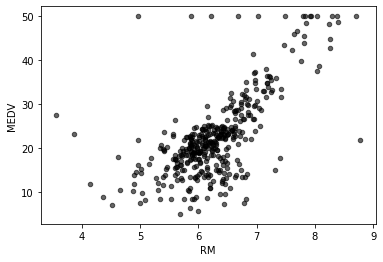

In [15]:
housing_df.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.6, color = "black")

## Combining attributes

In [16]:
housing_df["TPM"] = housing_df["TAX"]/housing_df["RM"]
corr_matrix = housing_df.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.676873
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TPM       -0.526678
LSTAT     -0.740494
Name: MEDV, dtype: float64

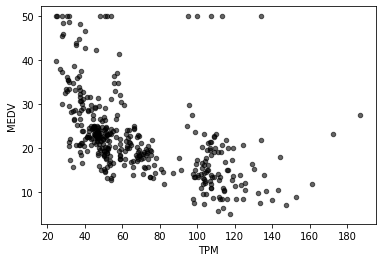

In [17]:
housing_df.plot(kind = "scatter", x = "TPM", y = "MEDV", alpha = 0.6, color = "black")

In [18]:
housing_df = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing attributes(the concept)

In [19]:
# Three options
# 1. Remove the missing data points
# 2. Remove whole attribute
# 3. Replace missing data points by some value(0, mean or median)

In [20]:
op1 = housing_df.dropna(subset=["RM"])
op1.shape

(397, 13)

In [21]:
op2 = housing_df.drop("RM", axis = 1)
op2.shape

(404, 12)

In [22]:
median = housing_df["RM"].median()
op3 = housing_df.fillna(median)
op3.shape

(404, 13)

## Missing attributes(the built-in function method)

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing_df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [24]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [25]:
a = imputer.transform(housing_df)
housing_tr = pd.DataFrame(a, columns = housing_df.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: float64(13)
memory usage: 41.1 KB


## Scikit-learn design

Three kind of objects

1. Estimators : Estimates some parameter based on a dataset, eg. SimpleImputer. Consists of fit() and transform() methods. Fit method fits the dataset and calculates the internal parameters or hyperparameters.


2. Transformers : takes input and returns output based on findings from the fit() method. Has a convenience function called fit_transform() which is faster than individual functions calls of fit() and transform().


3. Predictors : outputs possible value for the target variable based on model, eg. LinearRegression(), KNearestNeighbors(). Has a fit() and predict() functions. Also has a score()function that evaluates the accuracy of the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods

1. Normalization (Min-Max Scaling) : value scales down to values between 0 and 1. Sklearn provides MinMaxScaler()
   (value-min)/(max-min)
   

2. Standardization : variance is 1. Sklearn provides StandardScaler()
   (value-mean)/(standard deviation) 


## Creating a pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])


In [27]:
housing_num_tr = my_pipeline.fit_transform(housing_df)
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting the desired model for Dragon Real Estates

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression() 
#model = DecisionTreeRegressor() 
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

C:\Users\haima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
some_data = housing_df.iloc[:5]
some_labels = housing_labels[:5]
prep_data = my_pipeline.transform(some_data)
model.predict(prep_data)

array([22.52, 25.51, 16.19, 23.56, 23.89])

In [30]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [31]:
from sklearn.metrics import mean_squared_error
housing_pred = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_pred)
rmse = np.sqrt(mse)

In [32]:
rmse

1.3372956492359296

## Using better evaluation (Cross-validation) to avoid overfitting

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv =10)
rmse_scores =np.sqrt(-scores) 
rmse_scores

array([3.06769318, 3.30323382, 4.78120405, 2.7259373 , 3.47099337,
       3.00162081, 4.98653362, 3.77246173, 3.71413853, 4.1489806 ])

In [34]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean score : ", scores.mean())
    print("Std of score : ", scores.std())

In [35]:
print_scores(rmse_scores)

Scores :  [3.06769318 3.30323382 4.78120405 2.7259373  3.47099337 3.00162081
 4.98653362 3.77246173 3.71413853 4.1489806 ]
Mean score :  3.6972797006667477
Std of score :  0.7125547076393969


## Saving the model

In [36]:
from joblib import dump, load
dump(model,"Dragon.joblib")

['Dragon.joblib']

## Testing the model on test data

In [37]:
X_test = strat_test_set.drop("MEDV", axis =1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prep = my_pipeline.transform(X_test)
final_pred = model.predict(X_test_prep)
final_mse = mean_squared_error(Y_test,final_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

3.2721186996063767

## Model Usage

In [40]:
import numpy as np
from joblib import dump, load
model = load("Dragon.joblib")

features = np.array([[-0.43942006,  7.12628155, -5.12165014, -0.27288841, -1.42262747,
       -0.23894515, -4.31238772,  2.61111401, -1.0016859 , -2.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([28.24])